# 2 - Perceptron
> The goal of this homework is to develop a further understanding of the perceptron, a fundamental building block of machine learning.

In this homework, we will implement the perceptron algorithm from scratch and experiment with it in different conditions. Submit a written report in .pdf format (no code) to the corresponding deliverable entry in the aula virtual. The report should contain a description of the whole procedure with some representative figures.

# 1 - Generate the data

The first thing we need to do is to define a function to generate synthetic datasets suitable for the task. In this homework, we will experiment with datasets of different sizes and different dimensions.

To build an intuition, we start with 2-dimensional data points. Start by sampling random points $\mathbf{x}_n\in \mathbb{R}^2$ in a plane within a finite range. Then, choose a random line in the plane as your target function $f$, where each side of the line belongs to a class, e.g., $f(\mathbf{x})=\pm 1$. Finally, generate the dataset $\left\{\left(\mathbf{x}_n,y_n\right)\right\}$, with labels $y_n = f(\mathbf{x}_n)$.

To generalize this approach to arbitrary dimension $d$, we simply need to change our line $f$ to a hyperplane.

# 2 - Perceptron in $\mathbb{R}^2$

We will start by building some intuition in two dimensions, which is very easy to visualize. 

## 2.1 - Sparse data points

Generate a dataset with 20 data points and run the perceptron algorithm. Plot the examples $\left\{\left(\mathbf{x}_n,y_n\right)\right\}$, and the target function $f$ and the final hypothesis $g$ on a plane. Report the number of updates that the algorithm took to converge.

Repeat the procedure with more randomly generated datasets of the same size. Can you observe any differences? Report the results as described for the first dataset for two significant additional datasets.   

Updates: 15707


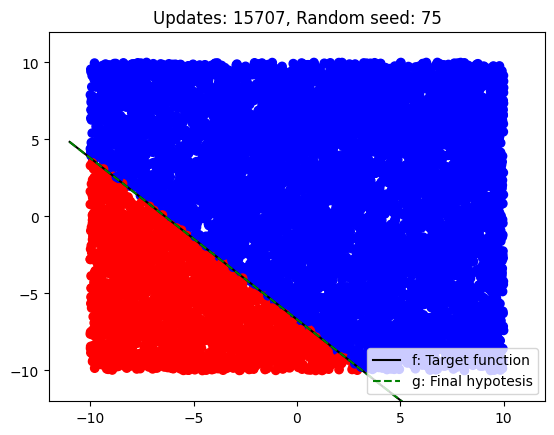

In [98]:
import numpy as np
import matplotlib.pyplot as plt


def generate_2d_dataset(num_points, range_x, range_y, random_seed=None):
    np.random.seed(random_seed)
    X = np.random.uniform(range_x[0], range_x[1], (num_points, 2))
    w = np.random.uniform(-1, 1, 2)
    b = np.random.uniform(range_y[0], range_y[1])
    y = np.sign(np.dot(X, w) + b)
    return X, y, w, b

def perceptron(X, y, max_updates=99999):
    w = np.zeros(X.shape[1])
    b = 0
    updates = 0
    while updates < max_updates:
        misclassified = (np.dot(X, w) + b) * y <= 0
        if not misclassified.any():
            break
        i = np.random.choice(np.where(misclassified)[0])
        w += y[i] * X[i]
        b += y[i]
        updates += 1
    return w, b, updates

def plot_2d_dataset(X, y, w_target, b_target, w, b):
    fig, ax = plt.subplots()
    colors = ['red' if yi == 1 else 'blue' for yi in y]
    ax.scatter(X[:, 0], X[:, 1], c=colors)
    x_range = np.array([X[:, 0].min() - 1, X[:, 0].max() + 1])
    y_target = -(w_target[0] * x_range + b_target) / w_target[1]
    y_hypothesis = -(w[0] * x_range + b) / w[1]
    ax.plot(x_range, y_target, "k-", label='f: Target function')
    ax.plot(x_range, y_hypothesis, "g--", label='g: Final hypotesis')
    ax.set_title(f'Updates: {updates}, Random seed: {random_seed}')
    ax.set_xlim([-12, 12])
    ax.set_ylim([-12, 12])
    plt.legend()
    plt.savefig(f'{num_points}_{random_seed}.pdf')
    plt.show()
random_seed = 75
num_points = 10000
X, y, w_target, b_target = generate_2d_dataset(num_points, [-10, 10], [-10, 10], random_seed)
w, b, updates = perceptron(X, y)
print("Updates:", updates)

plot_2d_dataset(X, y, w_target, b_target, w, b)



## 2.2 - Some more data

Generate two more random datasets with 100 and 1000 examples and run the perceptron algorithm. Plot the examples $\left\{\left(\mathbf{x}_n,y_n\right)\right\}$, and the target function $f$ and the final hypothesis $g$ on a plane. Report the number of updates that the algorithm took to converge. 



# 3 - Perceptron in $\mathbb{R}^{10}$

Now that we have built some intuition visualizing the algorithm in two dimensions, let's apply it in a high dimensional case.

Generate a dataset of 1000 samples with $\mathbf{x}_n\in\mathbb{R}^{10}$ and run the perceptron algorithm. How many updates does it take to converge?


Updates:1034 for dimension 2
Updates:1357 for dimension 3
Updates:2275 for dimension 4
Updates:2852 for dimension 5
Updates:11277 for dimension 6
Updates:122751 for dimension 7
Updates:23787 for dimension 8
Updates:14537 for dimension 9
Updates:46810 for dimension 10


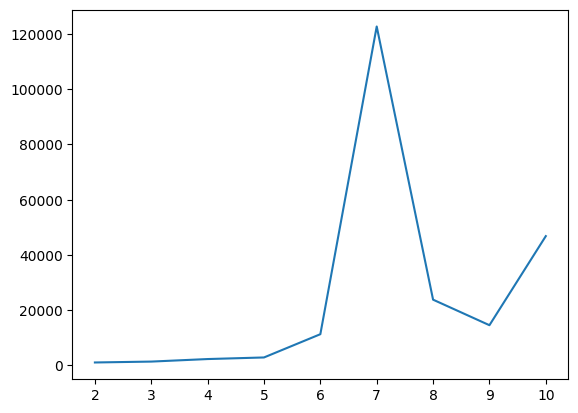

In [76]:
import numpy as np
updates_list, dimension_list = [], []
def generate_10D_dataset(num_points, range_x, range_y, dimension, random_seed=None):
    np.random.seed(random_seed)
    X = np.random.uniform(range_x[0], range_x[1], (num_points, dimension))
    w = np.random.uniform(-1, 1, dimension)
    b = np.random.uniform(range_y[0], range_y[1])
    y = np.sign(np.dot(X, w) + b)
    return X, y, w, b

def perceptron(X, y, max_updates=9999999):
    w = np.zeros(X.shape[1])
    b = 0
    updates = 0
    while updates < max_updates:
        misclassified = (np.dot(X, w) + b) * y <= 0
        if not misclassified.any():
            break
        i = np.random.choice(np.where(misclassified)[0])
        w += y[i] * X[i]
        b += y[i]
        updates += 1
    return w, b, updates

random_seed = 44
num_points = 1000
for dimension in range(2,11):
    X, y, w_target, b_target = generate_10D_dataset(num_points, [-10, 10], [-10, 10],dimension, random_seed)
    w, b, updates = perceptron(X, y)
    updates_list.append(updates)
    dimension_list.append(dimension)
    print(f"Updates:{updates} for dimension {dimension}")
plt.plot(dimension_list, updates_list)
plt.show()



# 4 - Conclusions

Summarize your conclusions regarding the accuracy (how close is $g$ to $f$) and running time of the perceptron algorithm as a function of the number of data points and the number of dimensions.

The accuracy of the perceptron algorithm depends on the degree of separation between the two classes in the input space. If the classes can be perfectly separated by a hyperplane (i.e., a linear decision boundary), then the perceptron algorithm will find a solution with zero error. On the other hand, if the classes cannot be perfectly separated, the perceptron algorithm will find a solution with some error.

In general, the running time of the perceptron algorithm is linear in the number of data points. This means that the algorithm will take longer to run on a larger dataset, but the time increase will be proportional to the size of the dataset. The running time is also linear in the number of dimensions, which means that the algorithm will take longer to run on a higher-dimensional dataset, but the time increase will again be proportional to the number of dimensions.

Therefore, as the number of data points and the number of dimensions increase, the running time of the perceptron algorithm will also increase, but the increase will be linear in both cases. The accuracy of the algorithm will depend on the separation between the classes in the input space, but in general, the higher the dimensionality of the input space, the harder it will be to find a solution with zero error.



